In [1]:
from google.colab import files
uploaded = files.upload()

Saving AChE_Bioactivity_data_1.csv to AChE_Bioactivity_data_1.csv
Saving AChE_Bioactivity_data_2.csv to AChE_Bioactivity_data_2.csv


## **Data Loading and Visualization**

In [3]:
!pip install pandas matplotlib seaborn rdkit scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 22.0 MB/s eta 0:00:00


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import Descriptors

sns.set(style="whitegrid")

**Step 1: Load the dataset**

In [42]:
df = pd.read_csv("AChE_Bioactivity_data_1.csv")
print(df.shape)
df.head()

(15542, 45)


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.75
1,NaN,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.10
2,NaN,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,50.00
3,NaN,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.30
4,NaN,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.80


In [43]:
df.tail()

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
15537,NaN,23106319,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4511474,Acetylcholinesterase (h) Eurofins-Cerep enzyme...,B,NaN,NaN,BAO_0000179,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,% Inhibition of Control Values (Mean n=2),%,NaN,NaN,11.0
15538,NaN,23107435,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4511555,Acetylcholinesterase (h) Eurofins-Cerep enzyme...,B,NaN,NaN,BAO_0000179,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,% Inhibition of Control Values (Mean n=2),%,NaN,NaN,7.1
15539,NaN,23107519,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4511555,Acetylcholinesterase (h) Eurofins-Cerep enzyme...,B,NaN,NaN,BAO_0000179,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,% Inhibition of Control Values (Mean n=2),%,NaN,NaN,14.5
15540,Not Active,23118491,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4800755,ACHOLINEST Eurofins SafetyScreen44 (BI),B,NaN,NaN,BAO_0000179,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,% Ctrl,%,NaN,NaN,87.0
15541,Not Active,23119783,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4508915,"Cholinesterase, Acetyl, ACES Eurofins-Panlabs ...",B,NaN,NaN,BAO_0000179,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,% inhibition,%,NaN,NaN,27.0


**Step 2: Clean + Inspect**

In [44]:
# Keep only the required columns and drop rows with NaNs
df = df[['molecule_chembl_id', 'canonical_smiles', 'standard_value', 'pchembl_value']].dropna()

# Drop duplicates
df.drop_duplicates(inplace=True)

# Filter out standard_value >= 1,000,000 (outliers) AND standard_value <= 0 (invalid for log)
df = df[(df['standard_value'] < 1_000_000) & (df['standard_value'] > 0)]

# Add log(IC50)
df['log_ic50'] = np.log10(df['standard_value'])


In [45]:
df.head()

,molecule_chembl_id,canonical_smiles,standard_value,pchembl_value,log_ic50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,6.12,2.875061
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,7.00,2.000000
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,6.52,2.477121
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,6.10,2.903090
5,CHEMBL130112,CSc1nc(-c2ccc(C)cc2)nn1C(=O)N(C)c1ccccc1,2400.0,5.62,3.380211


In [46]:
df.tail()

,molecule_chembl_id,canonical_smiles,standard_value,pchembl_value,log_ic50
15444,CHEMBL13045,COc1ccc2c(c[n+](C)c3c4cc5c(cc4ccc23)OCO5)c1OC,1450.0,5.84,3.161368
15445,CHEMBL659,COc1ccc2c3c1O[C@H]1C[C@@H](O)C=C[C@@]31CCN(C)C2,790.0,6.10,2.897627
15446,CHEMBL636,CCN(C)C(=O)Oc1cccc([C@H](C)N(C)C)c1,9940.0,5.00,3.997386
15516,CHEMBL3085398,C=CC(C)(C)c1cc([C@@H]2CC(=O)c3c(O)cc(O)c(CC=C(...,28980.0,4.54,4.462098
15517,CHEMBL253998,CC(C)=CCc1c(O)cc(O)c2c1O[C@H](c1ccccc1)CC2=O,6.4,8.19,0.806180


**Step 3: Visualize Distributions**

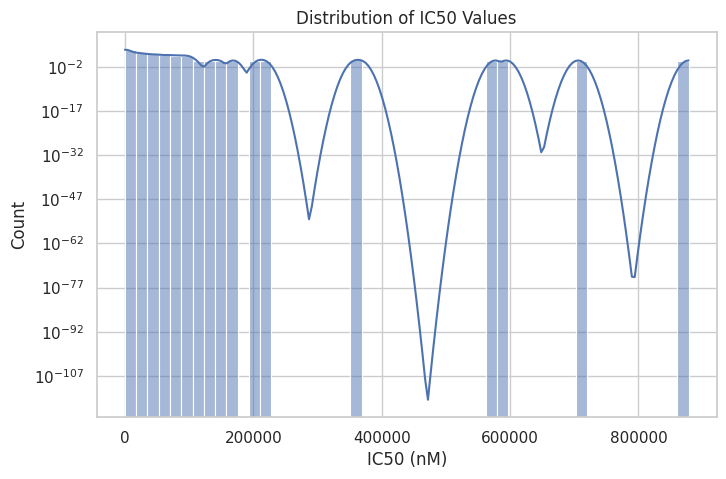

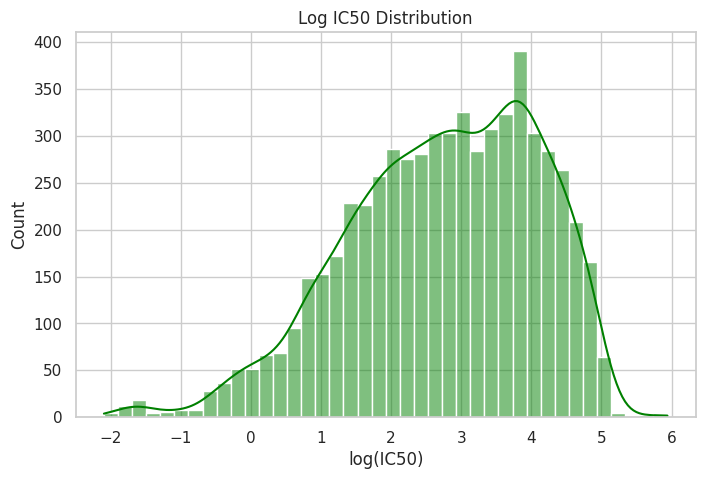

In [47]:
plt.figure(figsize=(8, 5))
sns.histplot(df['standard_value'], bins=50, kde=True)
plt.title('Distribution of IC50 Values')
plt.xlabel('IC50 (nM)')
plt.yscale('log')
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df['log_ic50'], bins=40, kde=True, color='green')
plt.title('Log IC50 Distribution')
plt.xlabel('log(IC50)')
plt.show()

**Step 4: Add Activity Labels (Binary)**

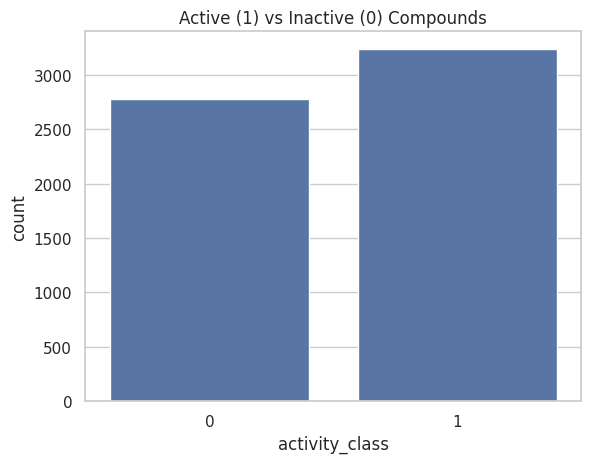

In [48]:
# Threshold at 1000 nM
df['activity_class'] = df['standard_value'].apply(lambda x: 1 if x <= 1000 else 0)

sns.countplot(x='activity_class', data=df)
plt.title('Active (1) vs Inactive (0) Compounds')
plt.show()

## **Feature Engineering**

**Step 5: Molecular Descriptors via RDKit**

In [49]:
def compute_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return {
            'MolWt': Descriptors.MolWt(mol),
            'LogP': Descriptors.MolLogP(mol),
            'NumHDonors': Descriptors.NumHDonors(mol),
            'NumHAcceptors': Descriptors.NumHAcceptors(mol)
        }
    else:
        return {
            'MolWt': None,
            'LogP': None,
            'NumHDonors': None,
            'NumHAcceptors': None
        }

descriptor_df = df['canonical_smiles'].apply(compute_descriptors)
desc_df = pd.DataFrame(descriptor_df.tolist())
df = pd.concat([df, desc_df], axis=1)

**Visualize Correlations**

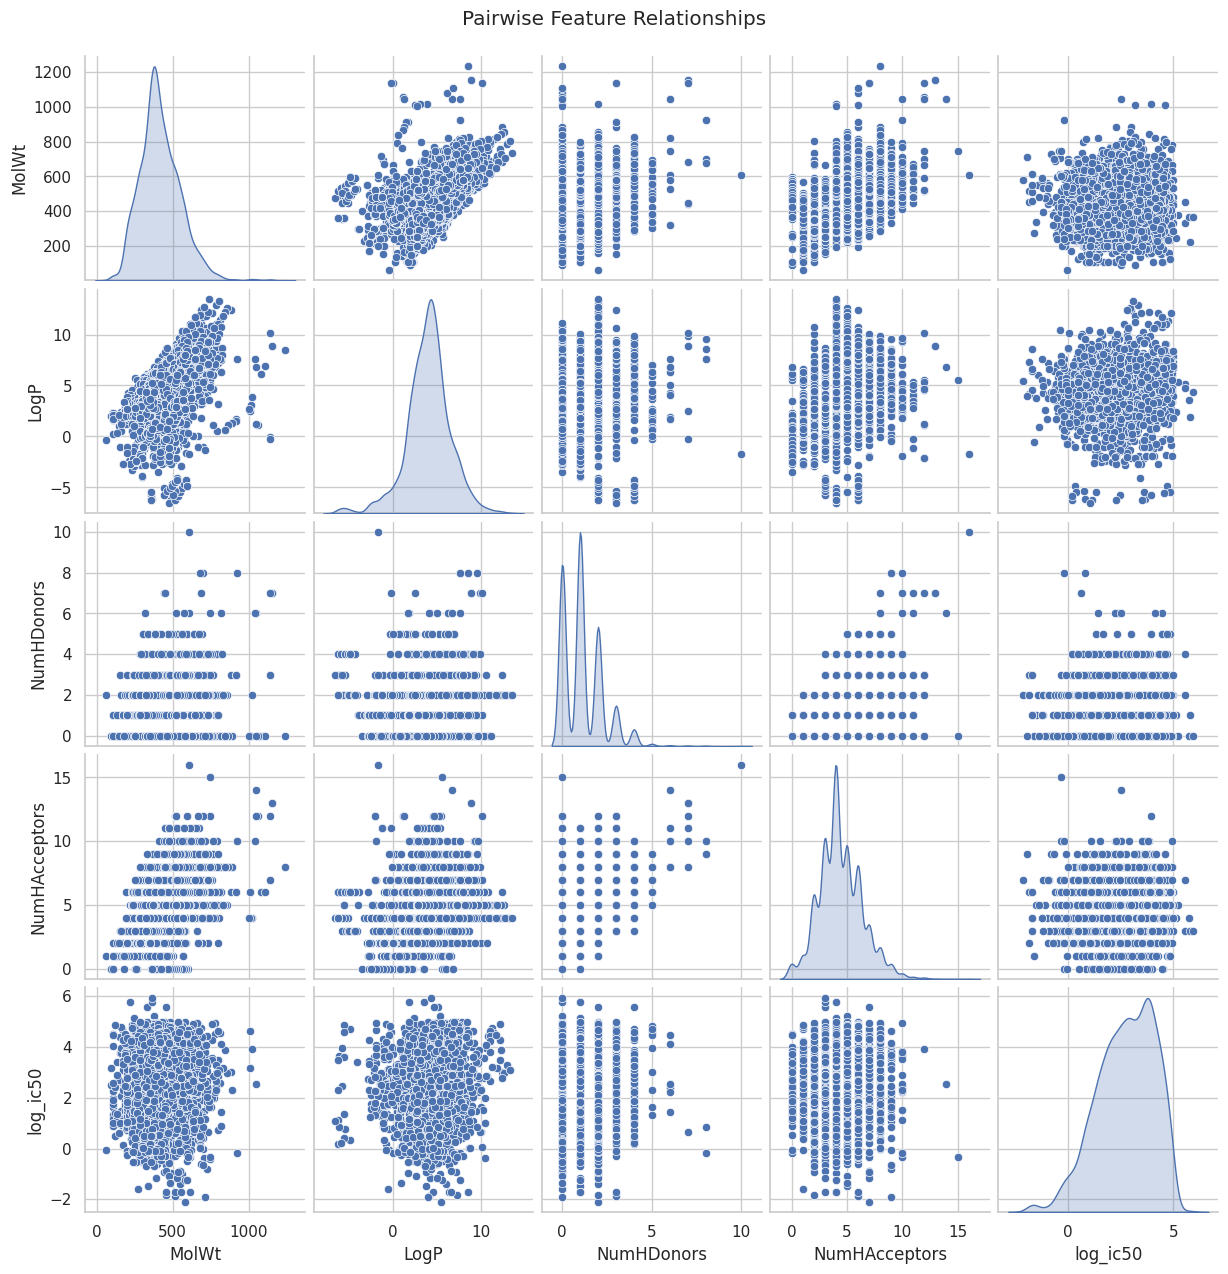

In [50]:
sns.pairplot(df[['MolWt', 'LogP', 'NumHDonors', 'NumHAcceptors', 'log_ic50']], diag_kind='kde')
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()


##**Baseline Model**

In [51]:
print("NaNs after descriptor generation:")
print(df[['MolWt', 'LogP', 'NumHDonors', 'NumHAcceptors']].isna().sum())
# Drop rows with any NaN in the descriptor columns
df.dropna(subset=['MolWt', 'LogP', 'NumHDonors', 'NumHAcceptors', 'log_ic50'], inplace=True)

NaNs after descriptor generation:
MolWt            3437
LogP             3437
NumHDonors       3437
NumHAcceptors    3437
dtype: int64


In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

features = ['MolWt', 'LogP', 'NumHDonors', 'NumHAcceptors']
X = df[features]
y = df['log_ic50']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)


R² Score: -0.060322571345859055
RMSE: 1.3539964713565344
